In [1]:
import itertools
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from visualisations.read_files import read_ost_scores
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os

prop_cycle = plt.rcParams["axes.prop_cycle"]
default_colours = prop_cycle.by_key()["color"]
part2name = {"half":"Both", "low":"Lower", "up":"Upper","none":"None", "full":"Full", "mean":"Mean"}
part2colour = {"half":default_colours[0], "low":default_colours[1], "up":default_colours[2],"none":default_colours[3], "full":default_colours[4], "mean":default_colours[5]}
#matplotlib.use("Agg")
plt.style.use("seaborn-colorblind")
markers = list(Line2D.markers.keys())
hatches = ["", "/", "\\", "|", "-", "x", "o", "+", "O", ".", "*"]
default_hatches = [
    "".join(combi) for combi in list(itertools.product(hatches, hatches))[1:]
]

outputs = []
output = read_ost_scores(f"aggregation_test/2ubq_full/scores.json")
output = output|{"modification": "none", "part": "full"}
outputs.append(output)
output = read_ost_scores(f"aggregation_test/2ubq_none/scores.json")
output = output|{"modification": "none", "part": "none"}
outputs.append(output)
for modification in ["flattened", "randomized", "rfdiff", "rotated"]:
    for part in ["half", "low", "up"]:
        output = read_ost_scores(f"aggregation_test/2ubq_{part}_{modification}/scores.json")
        output = output | {"modification": modification, "part": part}
        outputs.append(output)
    output = read_ost_scores(f"aggregation_test/aggregated_{modification}/scores.json")
    output = output | {"modification": modification, "part": "mean"}
    outputs.append(output)
df = pd.DataFrame(outputs)
os.makedirs("tables", exist_ok=True)
df.to_csv("tables/aggregates.csv")
df

/tmp/ipykernel_1499773/3158412143.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


,lddt,ost_rmsd,tm_score,modification,part
0,0.989909,0.150215,0.998940,none,full
1,0.360373,15.158615,0.274480,none,none
2,0.732339,11.063678,0.757835,flattened,half
3,0.414529,16.081167,0.362162,flattened,low
4,0.765333,11.127297,0.766138,flattened,up
5,0.765333,11.127297,0.766138,flattened,mean
6,0.780801,10.976311,0.769472,randomized,half
7,0.323790,17.747150,0.341110,randomized,low
8,0.790069,10.512835,0.760624,randomized,up
9,0.790069,10.512835,0.760624,randomized,mean


[['#9467bd'], ['#9467bd'], ['#d62728'], ['#1f77b4'], ['#1f77b4'], ['#ff7f0e'], ['#2ca02c'], ['#8c564b'], ['#1f77b4'], ['#1f77b4'], ['#ff7f0e'], ['#2ca02c'], ['#8c564b'], ['#1f77b4'], ['#1f77b4'], ['#ff7f0e'], ['#2ca02c'], ['#8c564b'], ['#1f77b4'], ['#1f77b4'], ['#ff7f0e'], ['#2ca02c'], ['#8c564b']]
[('half', '#1f77b4'), ('low', '#ff7f0e'), ('up', '#2ca02c'), ('none', '#d62728'), ('full', '#9467bd'), ('mean', '#8c564b')]


[]

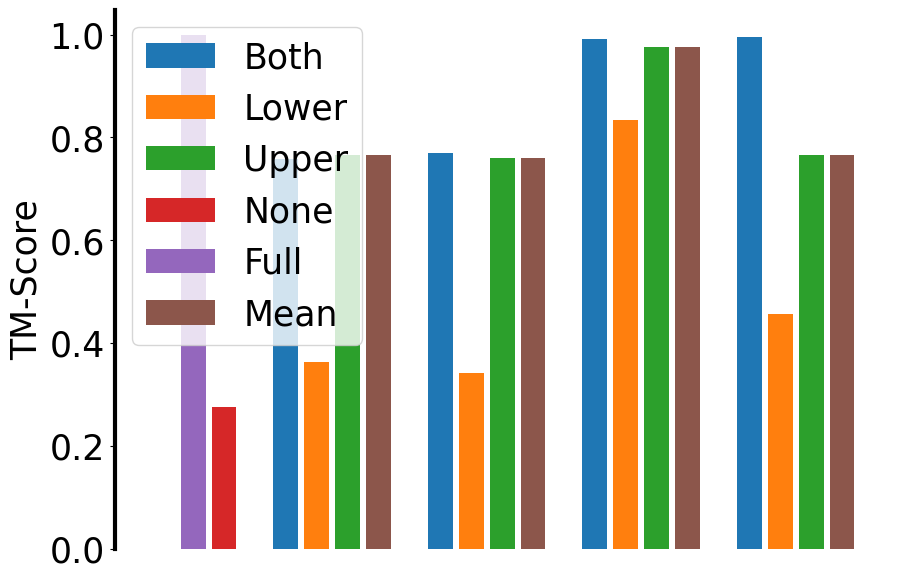

In [2]:
matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['figure.figsize'] = (10, 7)
lddts=[]
tm_scores=[]
colours=[]
edgecolors=[]
hatches=[]
names=[]
sizes=[]
curr_modification = None
for name, row in df.iterrows():
    if curr_modification is None or row["modification"]!=curr_modification:
        curr_modification=row["modification"]
        names.append(" ")
        tm_scores.append(0)
        colours.append([part2colour[row["part"]]])
    names.append(part2name[row["part"]])
    tm_scores.append(row["tm_score"])
    colours.append([part2colour[row["part"]]])
plt.ylabel("TM-Score")
plt.bar(np.array([it for it,_ in enumerate(names)]),tm_scores,color=[colour[0] for colour in colours])
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_linewidth(3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
colour_elements = [Patch(facecolor=colour, label=part2name[name]) for name, colour in part2colour.items()] 
plt.legend(handles=colour_elements)
plt.savefig('figures/aggregates.png',bbox_inches="tight", transparent=True)
plt.savefig('figures/aggregates.svg',bbox_inches="tight", transparent=True)
plt.plot()

[]

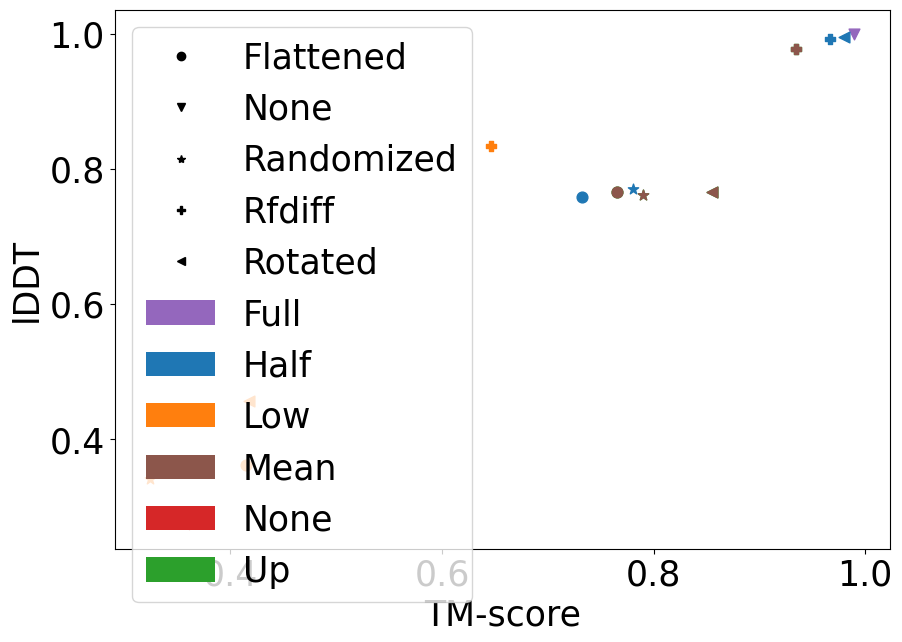

In [3]:
part2colour = {"half":0, "low":1, "up":2,"none":3, "full":4, "mean":5}
modification2marker = {"flattened":"o", "randomized":"*", "rfdiff":"P", "rotated":"<", "none":"v"}
for row in df.iterrows():
    info = row[1] 
    plt.scatter(info["lddt"], info["tm_score"], s=60, c=default_colours[part2colour[info["part"]]], marker=modification2marker[info["modification"]],)
plt.ylabel("lDDT")
plt.xlabel("TM-score")
marker_elements = [Line2D([0],[0], linestyle='', color="k", marker=marker, label=name.capitalize()) for name, marker in sorted(modification2marker.items())  ]
colour_elements = [Patch(facecolor=default_colours[number], label=name.capitalize()) for name, number in sorted(part2colour.items())] 
plt.legend(handles=marker_elements+colour_elements)
plt.savefig('figures/aggregates.png',bbox_inches="tight", transparent=True)
plt.savefig('figures/aggregates.svg',bbox_inches="tight", transparent=True)
plt.plot()